In [1]:
from scipy.io import loadmat
from scipy import stats
#from scipy.io import savemat
%matplotlib inline 
import numpy as np
#import pylab
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
#import scipy.stats as st
import seaborn as sns
#from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Input, LSTM, GRU
from tensorflow.keras.layers import Dense, Lambda,Flatten,Activation
from tensorflow.keras.optimizers import RMSprop,Adam
#from keras import objectives
#from keras.models import load_model
#from tensorflow.python.keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils  import plot_model
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as mt
#from sklearn.decomposition import PCA
#from tslearn.clustering import KShape
#from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from copy import copy 
#import plotly.express as px
#from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17077215545161351545, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4991025152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10990089151473493691
 physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [5]:
#dataset_before= loadmat("PTZ30uM/Before_Plate4_10min+VoltageData+WellB5..mat")
dataset_after = loadmat("PTZ30uM/PTZ_Plate4_0-10min+VoltageData+WellB5..mat")
#dataset = loadmat("mat_file/4-AP DMSO 0.1M_4AP_Plate2_60-70min+VoltageData+WellC5.nex5.mat")

In [6]:
#dataset_before = dataset_before["data"]
dataset_after= dataset_after["data"]
#dataset = dataset["DATA"]

In [7]:
"""
    data= pd.DataFrame(data=dataset_before,
                  columns=["ch"+str(i+1) for i in range(16)],
                  index=np.arange(0,600000,0.05))
    data.head()
            """

'\n    data= pd.DataFrame(data=dataset_before,\n                  columns=["ch"+str(i+1) for i in range(16)],\n                  index=np.arange(0,600000,0.05))\n    data.head()\n            '

In [8]:
data_after= pd.DataFrame(data=dataset_after,
              columns=["ch"+str(i+1) for i in range(16)],
              index=np.arange(0,600000,0.05))
data_after.head()
                 

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16
0.00,-0.003357,0.002136,-0.000458,0.000458,-0.004425,-0.002594,-0.002136,-0.005799,-0.011750,-0.013276,-0.012207,-0.013428,-0.020600,-0.014191,-0.016785,-0.026551
0.05,-0.035859,-0.023804,-0.026246,-0.029298,-0.037233,-0.032807,-0.029298,-0.032807,-0.033570,-0.030976,-0.024262,-0.018006,-0.025788,-0.014191,-0.020142,-0.032044
0.10,-0.013886,-0.005493,-0.006256,-0.011444,-0.012360,-0.006561,-0.007172,-0.002594,-0.010224,-0.008087,-0.004578,0.000763,-0.004730,0.000305,-0.002136,-0.007782
0.15,-0.005799,-0.002441,-0.004578,-0.005341,-0.005799,0.000153,-0.002747,-0.000763,-0.009308,-0.007019,-0.000763,-0.000610,-0.010224,-0.002594,-0.000153,-0.004425
0.20,-0.009461,-0.004425,-0.005951,-0.007324,-0.009003,-0.001831,-0.007172,-0.006561,-0.011597,-0.009461,-0.004120,-0.005036,-0.008393,0.000305,-0.000763,-0.013733


In [9]:
"""for i in data_after.columns:
    data_after[i].plot()
    #plt.ylim(-0.08,0.06)
    plt.show()
              """

'for i in data_after.columns:\n    data_after[i].plot()\n    #plt.ylim(-0.08,0.06)\n    plt.show()\n              '

In [10]:
#data_before = np.array(df)
data_after_admination = np.array(data_after)

In [11]:
time = data_after.index.values
#df_after = data_after.columns

In [13]:

normal_data = data_after_admination[3000000:5000000,0]
anomaly_data = data_after_admination[10000000:12000000,0]
normal_data_train = data_after_admination[3000000:4600000,0]
normal_data_test = data_after_admination[4600000:5000000,0]
anomaly_test = data_after_admination[2000000:4000000,0]

time_normal_train = time[3000000:4600000]
time_normal = time[3000000:5000000]
time_anomaly = time[10000000:12000000]
time_normal_test = time[4600000:5000000]
time_anomaly_test = time[2000000:4000000]
                                          

C:\Users\hasho\Anaconda3\envs\keras-gpu-py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


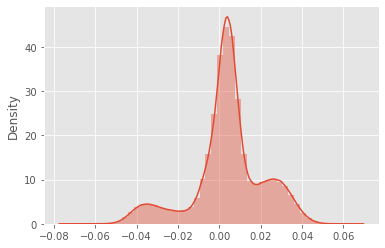

In [54]:
sns.distplot(data_after_admination[:,0])
plt.savefig("PTZ30uM/Power_Point_2/seikibunnpu_normal.png")

In [12]:
scaler =  StandardScaler()
def Normalization(normal_cycle):
    mea = normal_cycle.reshape(len(normal_cycle), -1)
    print('length of MEA data : ', len(mea))
    std_mea = scaler.fit_transform(mea)
    print(std_mea.shape)
    
    return std_mea

In [13]:
def get_data(data, time_steps):
    docX, docY = [],[]
    for i in range(len(data)-time_steps):
        docX.append(data[i:i+time_steps])
        docY.append(data[i+time_steps])
        
    alsX = np.array(docX)
    alsX = alsX.reshape(len(alsX),time_steps,1)
    alsY = np.array(docY)
    alsY = alsY.reshape(len(alsY),1)
    return alsX

window = 30

In [32]:
x_ch1_std= Normalization(data_after_admination[:,0])
x_ch1_window= get_data(x_ch1_std, window)

length of MEA data :  12000000
(12000000, 1)


In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Time(ms)")
plt.plot(time[3000000:4600000],x_ch1_std[3000000:4600000,0,0])
plt.savefig("PTZ30uM/Power_Point_2/train_data.")

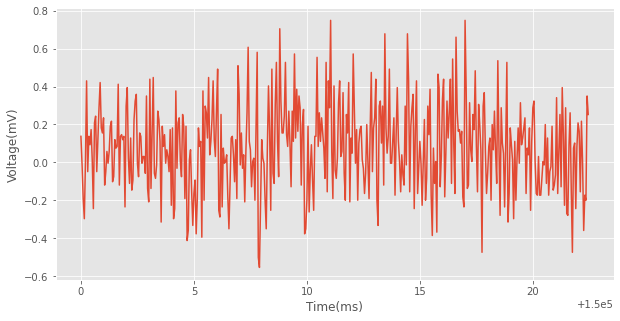

In [49]:
plt.figure(figsize=(10,5))
plt.xlabel("Time(ms)")
plt.ylabel("Voltage(mV)")
#plt.ylim(-5,5.5)
plt.plot(time_normal_train[:450],x_ch1_std[3000000:3000450])
plt.savefig("PTZ30uM/Power_Point_2/ptz_ch1_normal_22.5msec.png")

In [18]:
def create_model(input_dim,
                 time_steps,
                 latent_dim,
                 # データが一つしかないので1しか選べない
                 batch_size=1,
                 model_option='lstm',
                 optimizer='adam'
                ):
    x = Input(shape=(time_steps, input_dim,))

    if model_option == 'lstm':
        h = LSTM(latent_dim, stateful=False, return_sequences=True)(x)
    elif model_option == 'gru':
        h = GRU(latent_dim, stateful=False, return_sequences=True)(x)

    out = Dense(input_dim)(h)

    model = Model(x, out)
    model.summary()

    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

    return model

model = create_model(input_dim, 
                     time_steps=time_steps,
                     latent_dim=120,
                     model_option='lstm')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 400, 120)          58560     
_________________________________________________________________
dense (Dense)                (None, 400, 1)            121       
Total params: 58,681
Trainable params: 58,681
Non-trainable params: 0
_________________________________________________________________


In [19]:
#model.fit(normal_data, normal_data, epochs=1)
#model.save("mat_file/model_save/Plate5_10min+VoltageData+WellA5_LSTM_400_steps.h5")

In [19]:
model = tf.keras.models.load_model("mat_file/model_save/Plate5_10min+VoltageData+WellA5_LSTM_Anomaly_Detection_30_steps_2.h5")
#model = tf.keras.models.load_model("mat_file/model_save/Plate5_10min+VoltageData+WellA5_LSTM_400_steps.h5")

In [20]:
#window = time_steps
def predict_and_show_graph(time, x, scaler, model, name,window):
    prepare_value = x.copy()
    data_shape = x.shape
    preds = model.predict(prepare_value)
    
    #preds = preds.reshape(-1,1)
    #preds = scaler.fit_transform(preds)
    #pred = scaler.inverse_transform(preds)
    #pred = pred.reshape(data_shape)
    print(preds.shape)
    
    #prepare = prepare_value.reshape(-1,1)
    #prepared = scaler.inverse_transform(prepare)
    #original_data = prepared.reshape(data_shape)
    print(prepare_value.shape)
    #for i in range(prepare_value.shape[1]):
    plt.figure(figsize=(14, 8))
    plt.plot(time, prepare_value[:,0,0], color='b', label='data')
    plt.plot(time, preds[:,0,0], color='r', label='predict')
    plt.xlabel("Time(ms)")
    plt.ylabel("Voltage(mV)")
    plt.legend()
    plt.title(name)
    #plt.savefig("PTZ30uM/Power_Point_2/"+name+".png")
    plt.show()
    
    #evaluate =  model.evaluate(preds,prepare_value)
    #print('model evaluate mse:',evaluate)
    return preds

(11999970, 30, 1)
(11999970, 30, 1)


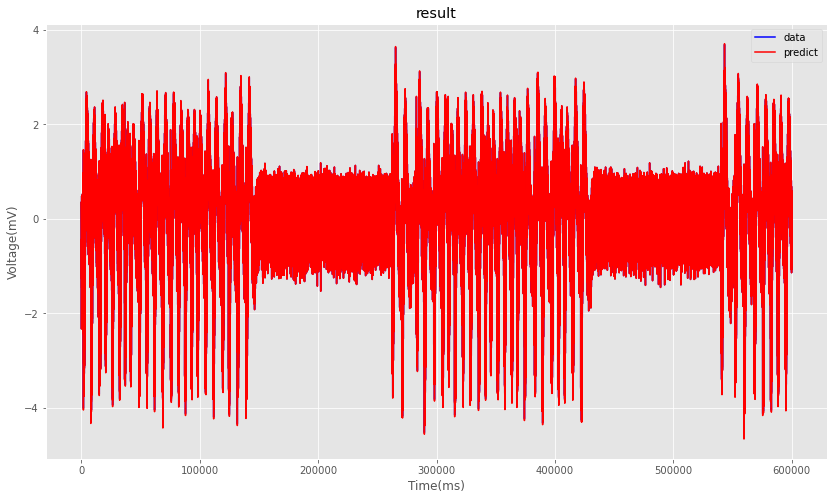

In [23]:
x_pred = predict_and_show_graph(time[window:], x_ch1 ,scaler, model, "result", window)

In [34]:
normal= Normalization(normal_data)
x_normal= get_data(normal, window)

length of MEA data :  2000000
(2000000, 1)


(1999970, 30, 1)
(1999970, 30, 1)


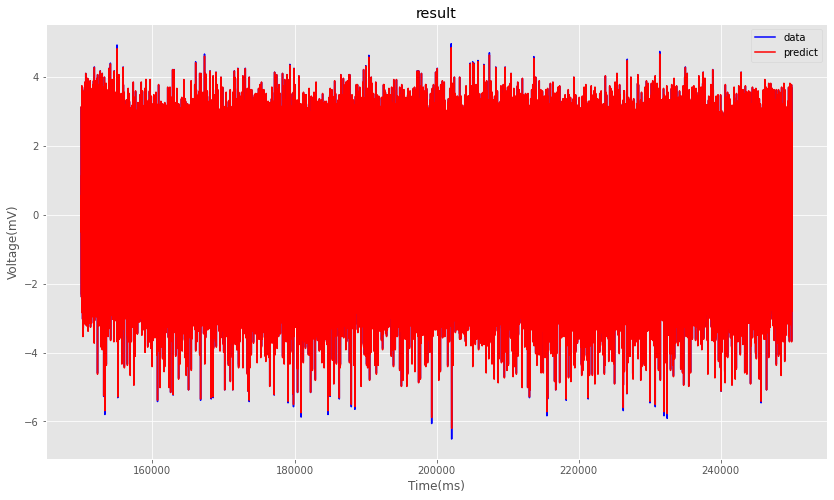

In [35]:
x_pred_normal = predict_and_show_graph(time_normal[window:], x_normal,scaler, model, "result", window)

(400000, 30, 1)
(400000, 30, 1)


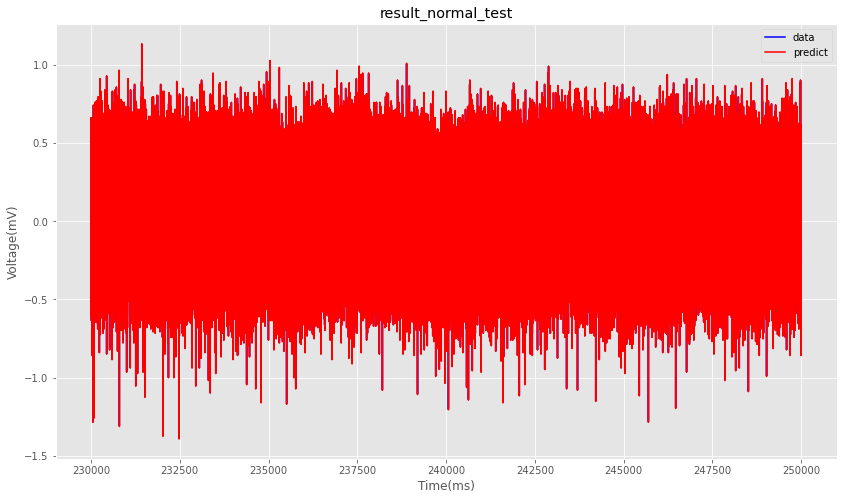

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



model evaluate mse: [1.6164044175020534e-05, 1.6164058e-05]


In [34]:
x_pred_test = predict_and_show_graph(time_normal_test, x_normal[4600000:5000000],scaler,model,"result_normal_test",window)

In [28]:
def error_mean_cov(pred_data, base_data):
    pred_data = pred_data.reshape(len(pred_data),window)
    base_data = base_data.reshape(len(base_data),window)

    print(pred_data.shape)
    print(base_data.shape)

    error = pred_data - base_data
    #error = error[:,96:99]
    print(error.shape)
    mean = np.mean(error, axis=0)
    print(mean.shape)

    cov = np.cov(error, rowvar=False, bias=True)
    print(cov.shape)
    
    
    return error, mean, cov

In [29]:
def Mahalanobis_dist(x, mean, cov):
    d = np.dot(x-mean, np.linalg.inv(cov))
    d = np.dot(d, (x-mean).T)
    return d

In [121]:
def Mahalanobis_Result(time, original_data, m_dist, name_1, name_2):
    fig, axes = plt.subplots(nrows=2, figsize=(15,5))

    axes[0].plot(time, original_data[:,0,0], color='b',label='original data')
    axes[0].set_xlabel('time(ms)')
    axes[0].set_ylabel('voltage(mV)' )
    axes[0].set_title(name_1)

    axes[1].plot(time, m_dist, color='r', label='Mahalanobis Distance')
    axes[1].set_xlabel('time(ms)')
    axes[1].set_ylabel(name_2)
    axes[1].set_title(name_2)
    #plt.savefig("PTZ30uM/Paper_Picture/"+name_2+".png")
    #plt.ylim(0,1000)
    plt.legend(fontsize=15)
    plt.savefig("PTZ30uM/Power_Point_2/"+name_2+".png")
    plt.show()

In [85]:
def Mahala_Threshold(time, a_99, m_dist, name):
    x = time
    y = m_dist
    a_99 = a_99
    
    #num=100
    #b=np.ones(num)/num
    #y2=np.convolve(y, b, mode='same')#移動平均
    #閾値
    #a_99= stats.chi2.ppf(9.9999999999e-1, 30)
    print(a_99)
    #y_max = max(y2)
    p = plt.figure(figsize=(15,5))
    p = plt.plot(x, y, "blue",label="Mahala_Distance" ,linestyle='solid')
    #p = plt.hlines([y_max], min(x), max(x),'y',label="MA_theshold")
    p = plt.hlines([a_99], min(x), max(x), "r",label="Threshold")     # hlines
    #p = plt.hlines([y_max], min(x), max(x),'y',label="MA_theshold")
    #p = plt.plot([xmin, xmax],[0.5, 0.5], "red", linestyle='dashed') # normal way
    #p = plt.plot(x,y2,'g--', label='MA')
    #p = plt.xlim(min(x),max(x))
    p = plt.ylim(0,500)
    p = plt.xlabel('Time(ms)')
    p = plt.ylabel('Mahalanobis_Distance')
    p = plt.title(name)
    p = plt.savefig("PTZ30uM/Power_Point_2/"+name+".png")
    plt.legend()
    plt.show(p)

In [26]:
error_anomaly, mean_anomaly, cov_anomaly = error_mean_cov(x_pred_anomaly, x_anomaly)
m_dist_anomaly = []
for e in error_anomaly:
    m_dist_anomaly.append(Mahalanobis_dist(e, mean_anomaly, cov_anomaly))

(1999970, 30)
(1999970, 30)
(1999970, 30)
(30,)
(30, 30)


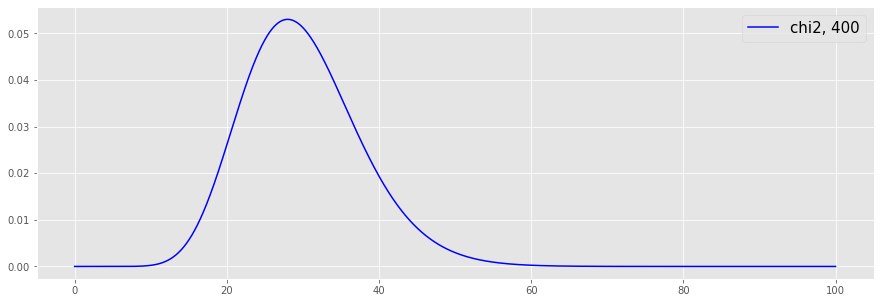

82.044143136957


In [87]:
x = np.linspace(0,100,2000)

plt.figure(figsize=(15,5))

plt.style.use('ggplot')

plt.plot(x, stats.chi2.pdf(x, 30), "b", label="chi2, 400")
plt.legend(fontsize=15)
plt.savefig("PTZ30uM/Power_Point_2/chi2_400.png")
plt.show()

a_99 = stats.chi2.ppf(0.999999, 30)
print(a_99)

In [35]:
anomaly_pred = m_dist_anomaly > a_99

length of MEA data :  12000000
(12000000, 1)
(11999970, 30, 1)
(11999970, 30, 1)


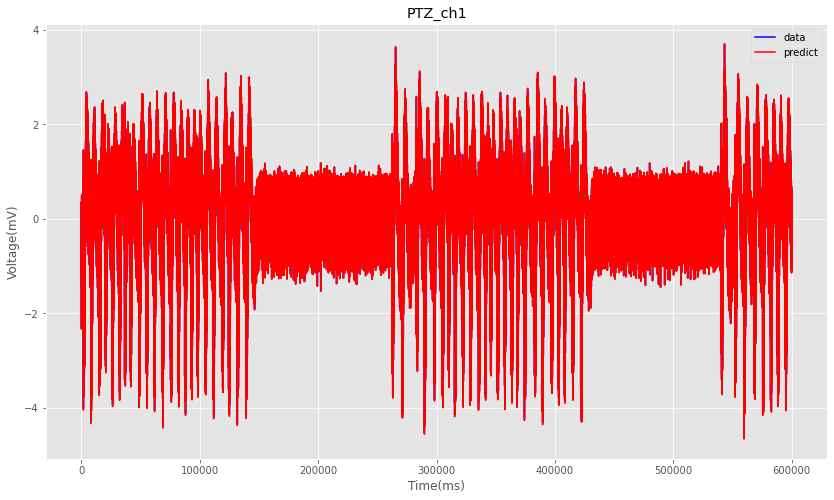

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



model evaluate mse: [6.761717286695922e-05, 6.761735e-05]


In [83]:
ch1_data = data_after_admination[:,0]
ch_1 = Normalization(ch1_data)
x_ch1 = get_data(ch_1, window)
x_pred_ch1 = predict_and_show_graph(time[window:], x_ch1,
                                          scaler, model, "PTZ_ch1",window)

In [88]:
error_ch1, mean_ch1, cov_ch1 = error_mean_cov(x_pred_ch1, x_ch1)
m_dist_ch1 = []
for e in error_ch1:
    m_dist_ch1.append(Mahalanobis_dist(e, mean_ch1, cov_ch1))

(11999970, 30)
(11999970, 30)
(11999970, 30)
(30,)
(30, 30)


In [128]:
#mahala_data = pd.DataFrame(m_dist_ch1,columns=["M_dist_ch1"])
#mahala_data.head()
#mahala_data.to_csv("PTZ30uM/mahala_heatmap/Mahalanobis_ch1.csv")

C:\Users\hasho\Anaconda3\envs\keras-gpu-py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


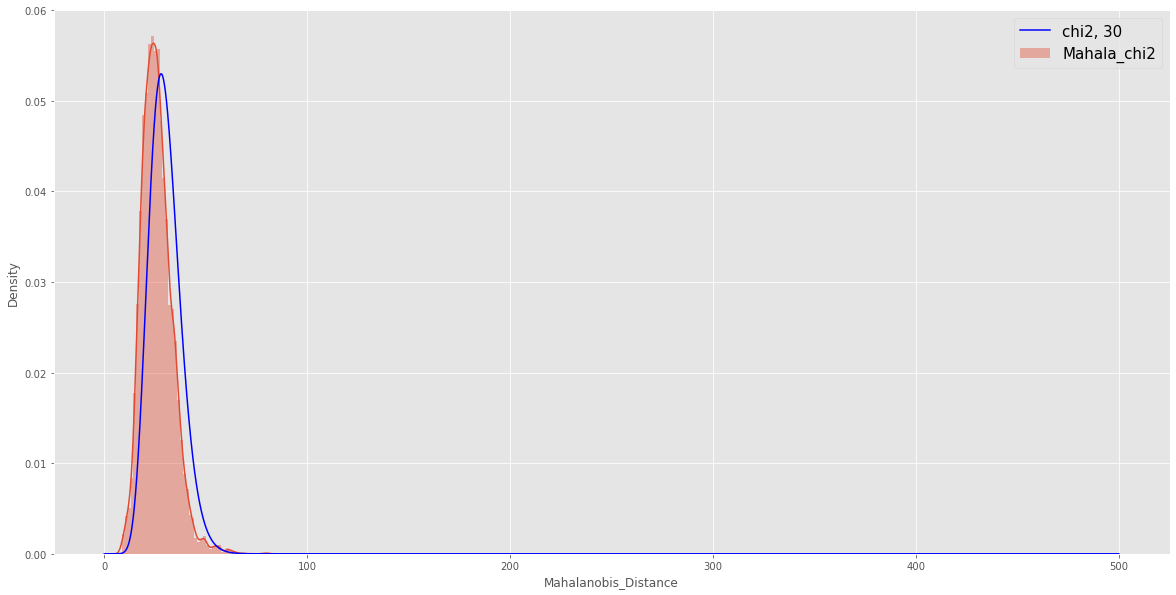

82.044143136957


In [120]:
x = np.linspace(0,500,10000)

plt.figure(figsize=(20,10))

plt.style.use('ggplot')
sns.distplot(m_dist_ch1[:10000],label="Mahala_chi2")
plt.xlabel("Mahalanobis_Distance")
plt.plot(x, stats.chi2.pdf(x, 30), "b", label="chi2, 30")
plt.legend(fontsize=15)
plt.savefig("PTZ30uM/Power_Point_2/chi2_30_hikaku.png")
plt.show()

a_99 = stats.chi2.ppf(0.999999, 30)
print(a_99)
#plt.figure()
#sns.distplot(m_dist_ch1[:10000])

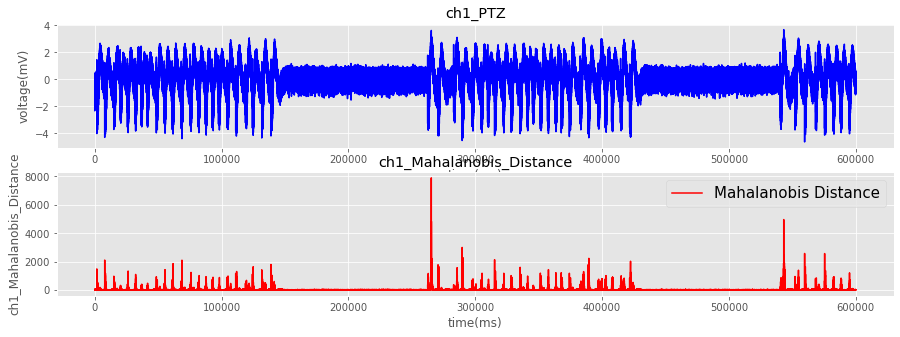

In [122]:
Mahalanobis_Result(time[window:], x_ch1, m_dist_ch1, "ch1_PTZ","ch1_Mahalanobis_Distance")
#Mahala_Threshold(time[window:], a_99, m_dist_ch1, "ch1_Mahalanobis_Distance_Threshold")

In [56]:
anomaly_pred_ch1 = m_dist_ch1 > a_99

In [ ]:
#data_m_dist_true_false = np.vstack((ch1_result, ch4_result))

In [57]:
d = anomaly_pred_ch1.T

In [58]:
d.shape

(11999970,)

In [59]:
df = pd.DataFrame(d,columns=["Time(ms)"])
#df_concat = pd.concat([a,df],axis=1)

In [60]:
df

,Time(ms)
0,False
1,True
2,False
3,False
4,False
...,...
11999965,False
11999966,False
11999967,False
11999968,False


In [61]:
df_one = df*1

In [62]:
#type(df)
df_one

,Time(ms)
0,0
1,1
2,0
3,0
4,0
...,...
11999965,0
11999966,0
11999967,0
11999968,0


In [ ]:
#df_concat = pd.concat([df,a],axis=1)

In [ ]:
#y = df_concat*1

In [63]:
df_one.to_csv("PTZ30uM/Mahalanobis_Distance/mahara_result_concat_m_dist_anomaly_data.csv",index=False)